## The research question I will be looking to in this notebook is:
### What is the mass distribution of these meteorites? 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


from scripts import project_functions
df = project_functions.load_and_process(r"C:\Users\Nolan\Desktop\DATA301\course-project-solo_311\data\raw\Meteorite_Landings.xlsx")

In [6]:
df['mass'].describe()

count    3.810000e+04
mean     1.402119e+04
std      5.719672e+05
min      0.000000e+00
25%      6.630000e+00
50%      2.900000e+01
75%      1.868500e+02
max      6.000000e+07
Name: mass, dtype: float64

In [2]:
df.loc[df['mass'] >= 100, 'mass_category'] = '>100g'
df.loc[df['mass'] <= 100, 'mass_category'] = '10g - 100g'
df.loc[df['mass'] <= 10, 'mass_category'] = '<10g' 

Text(0.5, 1.0, 'Number of Meteorites found by Mass Category')

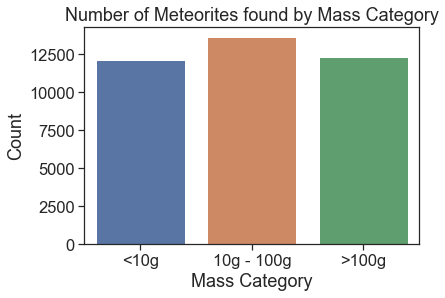

In [38]:
sns.set_theme(font_scale=1.5,style='ticks')
sns.countplot(data=df,x="mass_category",order=['<10g' ,'10g - 100g','>100g'])
plt.xlabel("Mass Category")
plt.ylabel("Count")
plt.title("Number of Meteorites found by Mass Category")

It appears that most of the meteorites discovered have a mass between 10-100g. However it is a fairly even distribution between these categories.

I should investigate to see if the actual mass distribution is similar.

In [35]:
df_masssum = df.groupby('mass_category').sum().reset_index()

Text(0.5, 1.0, '   Mass Distribution by Mass Category')

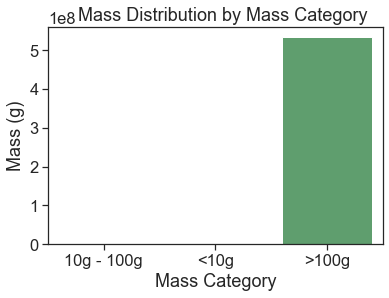

In [40]:
sns.barplot(data=df_masssum,x='mass_category',y='mass')
plt.xlabel("Mass Category")
plt.ylabel("Mass (g)")
plt.title("   Mass Distribution by Mass Category")

*Wow!* It looks like meteorites in the >100g category are the highest contributes to the sum of the masses of all the meteorites together.


To investigate further, I will find the mass distribution of the heaviest meteorites.

In [42]:
df_heaviest = df[['name','mass']].sort_values(by=['mass'],ascending=False)[:20]

Text(0.5, 1.0, 'Mass Distribution of Heaviest Meteorites')

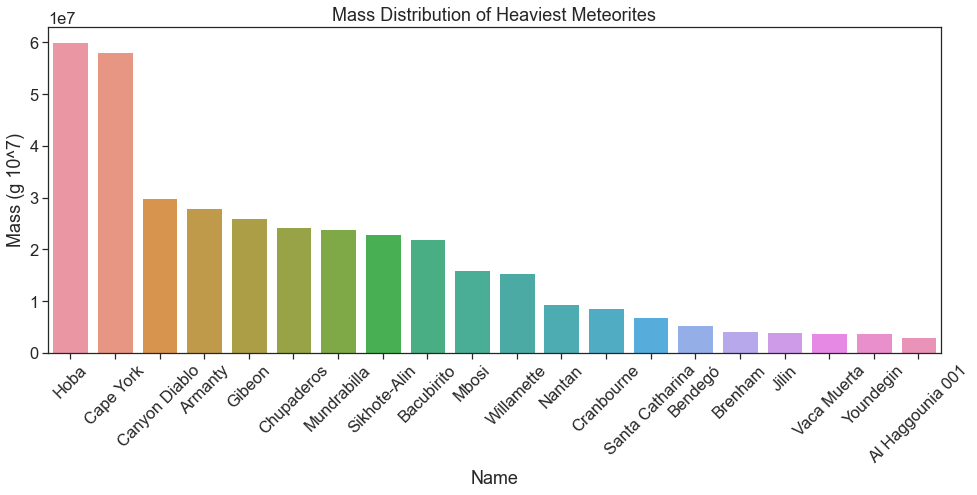

In [45]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_heaviest,x='name',y='mass',)
plt.xticks(rotation=45)
plt.xlabel("Name")
plt.ylabel("Mass (g 10^7)")
plt.title("Mass Distribution of Heaviest Meteorites")

### Bar plot of the mass distribution of the heaviest 20 meteorites
#### This plot shows the masses of the heaviest meteorites, the y-axis has the mass in $10^7$ grams and the x-axis shows the name.



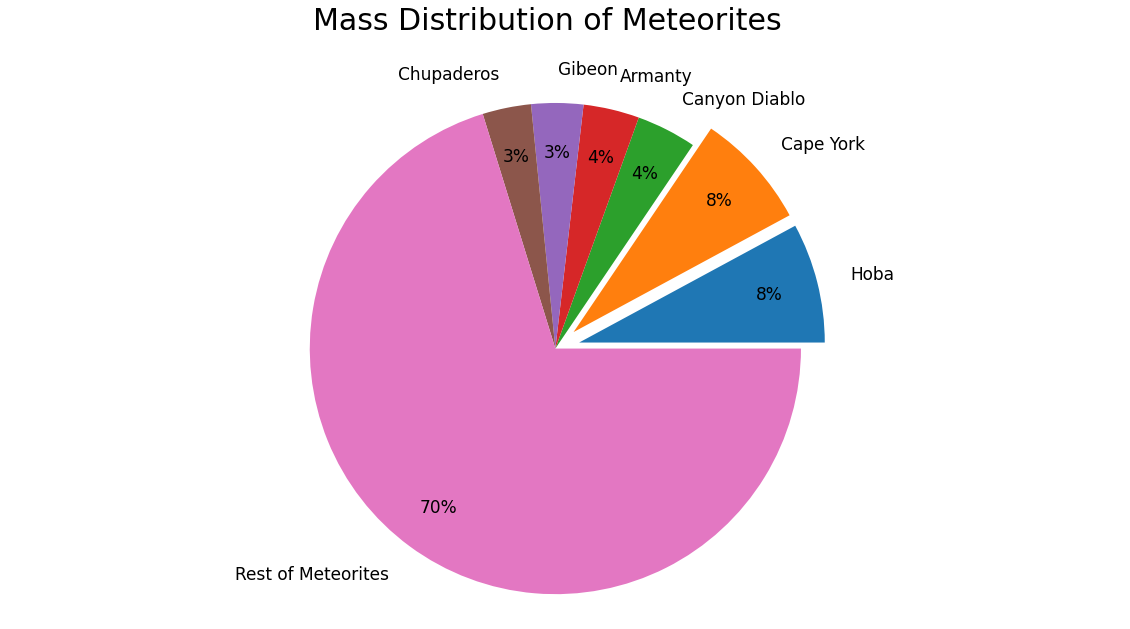

In [34]:
df_heaviest = df[['name','mass']].sort_values(by=['mass'],ascending=False)[:6]
other = pd.DataFrame([['Rest of Meteorites',df[6:]['mass'].sum()]],columns=['name','mass'])
df_heaviest=df_heaviest.append(other)
labels = list(df_heaviest["name"])
sizes = list(df_heaviest["mass"])
plt.rcParams['font.size'] = 17.0
colors = [ '#99CCFF', '#66CCFF', '#33CCFF', '#99CCFF', '#3399CC',
'#9999CF',  '#0090FF','#6666CC']
fig1, ax1 = plt.subplots(figsize=(20,10))
explode = (0.1, 0.1, 0, 0,0,0,0)
pie = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=False, labeldistance=1.14,pctdistance=0.8)


fig = plt.gcf()
ax1.axis('equal')
fig.suptitle("Mass Distribution of Meteorites",fontsize=30)

plt.show()

### Pie plot of Mass Distribution of Meteorites
#### This plot shows the mass distribution of the top six most massive meteorites compared to the total mass of the rest.

Looks like Hoba and Cape York have a much greater mass than any other meteorite, together they are the top two asteroids by mass make up 22% of the total.
The largest six meteorites contribute to 30% of the total mass of all meteorites.

# Conclusion
###  What is the mass distribution of these meteorites? 
### Findings
I have discovered that:
- The number of meteorites with a mass less than 10 grams equal the number of meteorites with a mass higher than 100 grams.
- Most meteorites have a mass between 10 and 100 grams.
- Meteorites with a mass over 100 grams have the highest contribution to the total mass of all meteorites.
- The two heaviest meteorites, Hoba and Cape York, make up 16% of the total mass of all meteorites.
- The largest six meteorites contribute to 30% of the total mass of all meteorites.